Mohammed Murtuza
CS375 Section 004
Professor Li
Project 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from scipy.stats import f
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Explaining Dataset

#### Categorical: Company, Ticker Symbol, Currency, Date
#### Numerical: Open, High, Low, Close, Adj Close, Volume

In [3]:
dataset = pd.read_csv('data/Top10VideoGameStocks.csv')
dataset

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,Sony Interactive Entertainment,SONY,JPY,28.525000,29.168751,20.850000,25.299999,14.535083,147012000
1,2000-02-01,Sony Interactive Entertainment,SONY,JPY,25.293751,31.475000,25.000000,31.350000,18.010864,67437000
2,2000-03-01,Sony Interactive Entertainment,SONY,JPY,30.100000,31.299999,21.700001,28.012501,16.093437,112674000
3,2000-04-01,Sony Interactive Entertainment,SONY,JPY,28.250000,28.250000,22.312500,22.562500,12.974537,74071000
4,2000-05-01,Sony Interactive Entertainment,SONY,JPY,22.700001,23.481251,17.750000,18.237499,10.487453,65035500
...,...,...,...,...,...,...,...,...,...,...
2204,2024-06-01,Playtika,PLTK,USD,8.760000,9.070000,7.680000,7.870000,7.677933,19793700
2205,2024-07-01,Playtika,PLTK,USD,7.860000,8.100000,7.230000,7.630000,7.536838,15108300
2206,2024-08-01,Playtika,PLTK,USD,7.670000,8.055000,6.610000,7.570000,7.477571,18138900
2207,2024-09-01,Playtika,PLTK,USD,7.490000,8.355000,7.150000,7.920000,7.823297,18116900


### Pick most important features for training the model
- Use scatter plots to find it

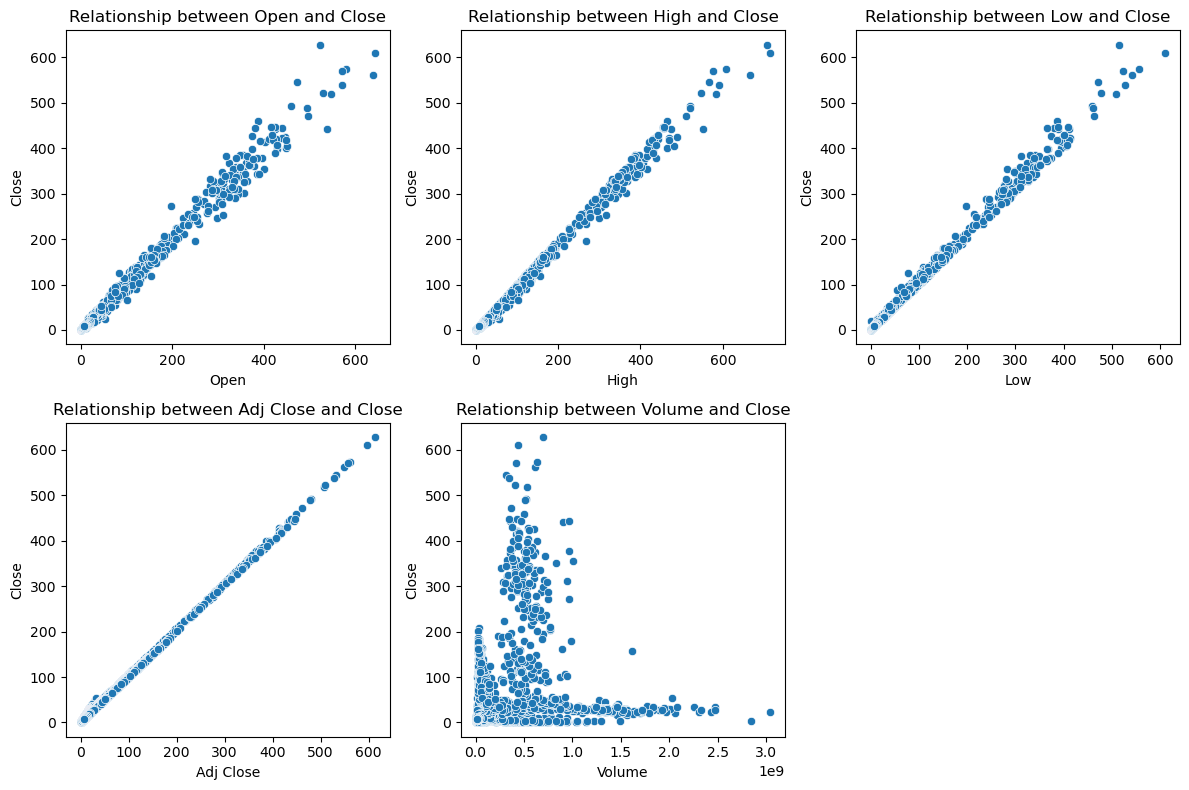

In [4]:
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(dataset, x=feature, y='Close')
    plt.title(f'Relationship between {feature} and Close')
    plt.tight_layout()
plt.show()

### The “Close” price is a key indicator of a stock’s performance as it reflects the final trading price within a specific period. Analysts often look at the closing price to track trends, make decisions, and compare historical values across days. Hence, we can use “Close” as our target variable to make conclusions from the daily culmination of market activity.
### Target Variable = Close
### Features for training = Open, High, Low, Adj Close, Volume

--------------------------------------------------------------------------------------------------------------------------------------------------------

### Preprocessing/Encoding

Prepare the data for the machine learning algorithms

- Drop null/empty values

In [5]:
missing_values = dataset.isnull().sum()
print(missing_values)

Date             0
Company          0
Ticker Symbol    0
Currency         0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64


- Drop features not necessary (Ticker Symbol, Currency)

In [6]:
data = dataset.drop(['Ticker Symbol', 'Currency'], axis=1)
data

,Date,Company,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,Sony Interactive Entertainment,28.525000,29.168751,20.850000,25.299999,14.535083,147012000
1,2000-02-01,Sony Interactive Entertainment,25.293751,31.475000,25.000000,31.350000,18.010864,67437000
2,2000-03-01,Sony Interactive Entertainment,30.100000,31.299999,21.700001,28.012501,16.093437,112674000
3,2000-04-01,Sony Interactive Entertainment,28.250000,28.250000,22.312500,22.562500,12.974537,74071000
4,2000-05-01,Sony Interactive Entertainment,22.700001,23.481251,17.750000,18.237499,10.487453,65035500
...,...,...,...,...,...,...,...,...
2204,2024-06-01,Playtika,8.760000,9.070000,7.680000,7.870000,7.677933,19793700
2205,2024-07-01,Playtika,7.860000,8.100000,7.230000,7.630000,7.536838,15108300
2206,2024-08-01,Playtika,7.670000,8.055000,6.610000,7.570000,7.477571,18138900
2207,2024-09-01,Playtika,7.490000,8.355000,7.150000,7.920000,7.823297,18116900


- Use one-hot encoding on Company and Data (Convert each categorical value into a numeric representation)

In [7]:
newdata = pd.get_dummies(data, columns=['Company', 'Date'], drop_first=True)
newdata

,Open,High,Low,Close,Adj Close,Volume,Company_Embracer Group,Company_Microsoft Gaming,Company_NetEase Games,Company_Nintendo,...,Date_2024-01-01,Date_2024-02-01,Date_2024-03-01,Date_2024-04-01,Date_2024-05-01,Date_2024-06-01,Date_2024-07-01,Date_2024-08-01,Date_2024-09-01,Date_2024-10-01
0,28.525000,29.168751,20.850000,25.299999,14.535083,147012000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,25.293751,31.475000,25.000000,31.350000,18.010864,67437000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,30.100000,31.299999,21.700001,28.012501,16.093437,112674000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,28.250000,28.250000,22.312500,22.562500,12.974537,74071000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,22.700001,23.481251,17.750000,18.237499,10.487453,65035500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,8.760000,9.070000,7.680000,7.870000,7.677933,19793700,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2205,7.860000,8.100000,7.230000,7.630000,7.536838,15108300,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2206,7.670000,8.055000,6.610000,7.570000,7.477571,18138900,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2207,7.490000,8.355000,7.150000,7.920000,7.823297,18116900,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [8]:
date_columns = [col for col in newdata.columns if 'Date' in col]
newdata[date_columns] = newdata[date_columns].astype(int)
company_columns = [col for col in newdata.columns if 'Company' in col]
newdata[company_columns] = newdata[company_columns].astype(int)
newdata

,Open,High,Low,Close,Adj Close,Volume,Company_Embracer Group,Company_Microsoft Gaming,Company_NetEase Games,Company_Nintendo,...,Date_2024-01-01,Date_2024-02-01,Date_2024-03-01,Date_2024-04-01,Date_2024-05-01,Date_2024-06-01,Date_2024-07-01,Date_2024-08-01,Date_2024-09-01,Date_2024-10-01
0,28.525000,29.168751,20.850000,25.299999,14.535083,147012000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25.293751,31.475000,25.000000,31.350000,18.010864,67437000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30.100000,31.299999,21.700001,28.012501,16.093437,112674000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28.250000,28.250000,22.312500,22.562500,12.974537,74071000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22.700001,23.481251,17.750000,18.237499,10.487453,65035500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,8.760000,9.070000,7.680000,7.870000,7.677933,19793700,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2205,7.860000,8.100000,7.230000,7.630000,7.536838,15108300,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2206,7.670000,8.055000,6.610000,7.570000,7.477571,18138900,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2207,7.490000,8.355000,7.150000,7.920000,7.823297,18116900,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


- Standardize data so that each feature has zero mean and unit variance. This allows all variables to contribute equally to the models and gives stability by avoiding larger numeric values from dominating.

In [9]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
scaler = StandardScaler()
newdata[numerical_columns] = scaler.fit_transform(newdata[numerical_columns])
newdata

,Open,High,Low,Close,Adj Close,Volume,Company_Embracer Group,Company_Microsoft Gaming,Company_NetEase Games,Company_Nintendo,...,Date_2024-01-01,Date_2024-02-01,Date_2024-03-01,Date_2024-04-01,Date_2024-05-01,Date_2024-06-01,Date_2024-07-01,Date_2024-08-01,Date_2024-09-01,Date_2024-10-01
0,-0.311269,-0.328559,-0.378252,-0.350832,-0.453901,-0.299754,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.347767,-0.304299,-0.328059,-0.282699,-0.414182,-0.497358,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.293479,-0.306140,-0.367972,-0.320285,-0.436093,-0.385023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.314375,-0.338223,-0.360564,-0.381661,-0.471734,-0.480884,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.377064,-0.388386,-0.415746,-0.430368,-0.500154,-0.503321,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,-0.534521,-0.539980,-0.537541,-0.547123,-0.532259,-0.615667,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2205,-0.544687,-0.550183,-0.542984,-0.549826,-0.533872,-0.627302,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2206,-0.546833,-0.550656,-0.550483,-0.550501,-0.534549,-0.619777,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2207,-0.548866,-0.547501,-0.543951,-0.546560,-0.530598,-0.619831,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Since the target variable (Close) is continuous (a numerical value), this is problem around regression. My goal is to predict a continuous value (the closing price of a stock).

--------------------------------------------------------------------------------------------------------------------------------------------------------

## First Model = Linear Regression

### Linear Regression Explanation

### Linear regression seeks to find the best-fitting line through the data points, which minimizes the difference between the observed values (the actual Close prices) and the predicted values (the values generated by the model)).It uses the Ordinary Least Squares. 

OLS is a mathematical approach that directly computes the optimal coefficients (weights) of the linear regression model. It minimizes the Residual Sum of Squares (RSS), which is the sum of squared differences between the predicted and actual values.

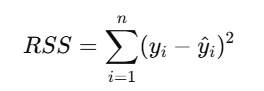 



yi = actual value, ŷ = predicted value, n = number of data points

#### All features except Close are being used, Close is target variable in this training

- Splitting the dataset into 80% training, 20% testing with a random state to ensure reproducible splits

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = newdata.drop('Close', axis=1)  
y = newdata['Close']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

## Evaluation Methods (MSE & R^2) for Linear Regression

- MSE measures the average of the squares of the errors, specifically, the average squared difference between the actual values and the values predicted by the model. A lower MSE indicates that the model’s predictions are closer to the actual data points.

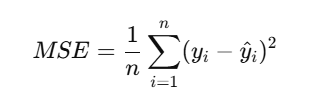
- R^2 represents the proportion of the variance in the dependent variable that is predictable from the independent variables. An R^2 closer to 1 means the model explains a large portion of the variability. On the otherhand, a R^2 around 0 indicates that the model does not explain much of the variation in the target variable.

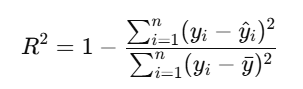

yi = actual value, ŷ = predicted value, n = number of data points, ȳ = mean of actual values


In [15]:
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear}, R-squared: {r2_linear}")

Linear Regression - MSE: 0.0003827861813238032, R-squared: 0.9995937350204944


--------------------------------------------------------------------------------------------------------------------------------------------------------

## Second Model = Random Forest Regressor

### Random Forest Regressor Explanation
### Random Forest builds an ensemble of decision trees to make predictions. Each tree is trained on a random subset of the data and features. The final prediction is the average (for regression) of all the predictions from the individual trees.
- Mean Squared Error (MSE) is the common criterion for splitting nodes in Random Forests, where the goal is to minimize the impurity (variance) at each split. Trees are built by finding the best splits that minimize MSE within each subset. 
The overall model minimizes the total MSE across all trees to improve generalization

## Evaluation Methods (MSE & R^2) for Random Forest Regressor

As explained, we will be using the same evaluation methods of MSE & R^2

In [12]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MSE: {mse_rf}, R-squared: {r2_rf}")

Random Forest Regressor - MSE: 0.0006364954924655025, R-squared: 0.9993244640459391


#### Both models have very high R-squared values and low MSE values, indicating they both perform extremely well at predicting Close. Linear Regression has a higher R^2 and a lower MSE so it performed better overall meaning that it's predictions were more accurate with lower error and it explains more variation in the "Close" price through the R^2. However, both did perform exceptionally well as the performance difference is small. 

--------------------------------------------------------------------------------------------------------------------------------------------------------

# Model Comparison 

## Linear Regression Strengths:
- Simple and straightforward
- Performed excellently (higher than random forest regressor)
- Faster for training and predicting
- Better for linear data & less outliers

## Weaknesses:
- Assumes linearity 
- Sensitive to outliers

## Random Forest Regressor Strengths:
- Performed exceptionally well
- Handles outliers strongly
- Less prone to overfitting

## Weaknesses:
- Less interpretable
- Expensive computationally
- Longer to predict than linear regression


# Conclusion
Linear Regression might perform better in this case because the relationship between the features and target might indeed be fairly linear. It can be affected by outliers because its optimization focuses on minimizing the squared errors. A single outlier with a large error can disproportionately influence the model’s performance. In this case, since the models have high R² values and low MSE, it seems the dataset might not have significant outliers or that the impact of any outliers is minimal.